In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape[1:]
X_train.shape

(11610, 8)

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import os
from pathlib import Path

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    #print( series.shape )
    return series[..., np.newaxis].astype(np.float32)

np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

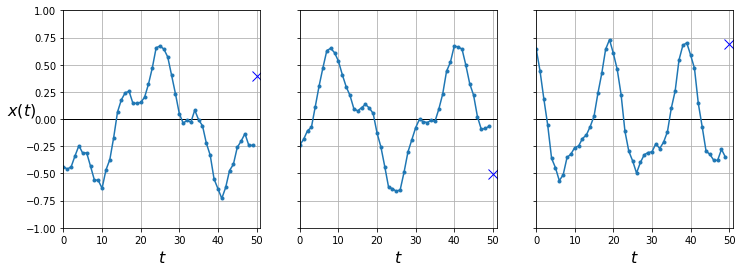

In [ ]:
series.shape
X_train.shape
y_train.shape

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
  plt.sca(axes[col])
  plot_series(X_valid[col, :, 0], y_valid[col, 0], y_label=("$x(t)$" if col==0 else None))
plt.show()

0.47568396


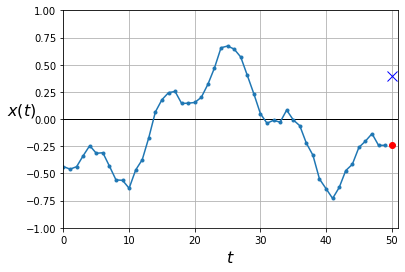

In [ ]:
y_pred = X_valid[:, -1]
loss = np.mean(keras.losses.mean_squared_error(y_valid, y_pred))
print(loss)

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1023 - val_loss: 0.0700
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0657 - val_loss: 0.0600
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0591 - val_loss: 0.0550
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0544 - val_loss: 0.0515
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0498 - val_loss: 0.0491
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0470 - val_loss: 0.0473
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0465 - val_loss: 0.0460
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0448
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0432 - val_loss: 0.0441
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0438 - val_loss: 0.0435

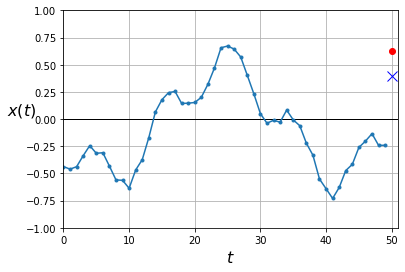

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[50, 1]),
  keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

evl = model.evaluate(X_valid, y_valid)
print(evl)

y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Epoch 1/20
219/219 [==============================] - 2s 7ms/step - loss: 0.4532 - val_loss: 0.0910
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0767 - val_loss: 0.0736
Epoch 3/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0732 - val_loss: 0.0728
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0727 - val_loss: 0.0730
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0711 - val_loss: 0.0735
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0708 - val_loss: 0.0731
Epoch 7/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0722 - val_loss: 0.0743
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0722 - val_loss: 0.0733
Epoch 9/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0695 - val_loss: 0.0727
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0716 - val_loss: 0.0735

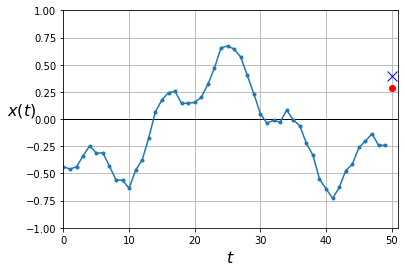

In [ ]:

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

evl = model.evaluate(X_valid, y_valid)
print(evl)


y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Epoch 1/20
219/219 [==============================] - 7s 25ms/step - loss: 0.2238 - val_loss: 0.0437
Epoch 2/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0426 - val_loss: 0.0330
Epoch 3/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0347 - val_loss: 0.0322
Epoch 4/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0293 - val_loss: 0.0243
Epoch 5/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0255 - val_loss: 0.0213
Epoch 6/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0223 - val_loss: 0.0222
Epoch 7/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0199 - val_loss: 0.0172
Epoch 8/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0185 - val_loss: 0.0188
Epoch 9/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0187 - val_loss: 0.0160
Epoch 10/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0179 - val_lo

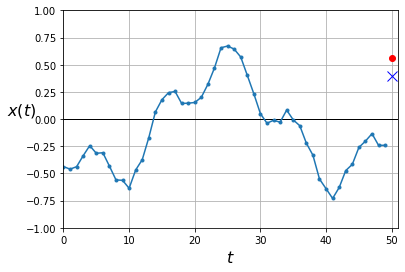

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

evl = model.evaluate(X_valid, y_valid)
print(evl)


y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Epoch 1/20
219/219 [==============================] - 5s 17ms/step - loss: 0.1081 - val_loss: 0.0407
Epoch 2/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0390 - val_loss: 0.0322
Epoch 3/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0330 - val_loss: 0.0310
Epoch 4/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0289 - val_loss: 0.0267
Epoch 5/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0278 - val_loss: 0.0260
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0263 - val_loss: 0.0268
Epoch 7/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0267 - val_loss: 0.0252
Epoch 8/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0258 - val_loss: 0.0254
Epoch 9/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0257 - val_loss: 0.0245
Epoch 10/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0256 - val_lo

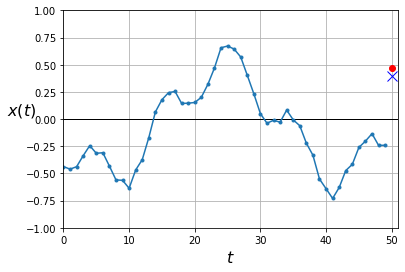

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

model.evaluate(X_valid, y_valid)

y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

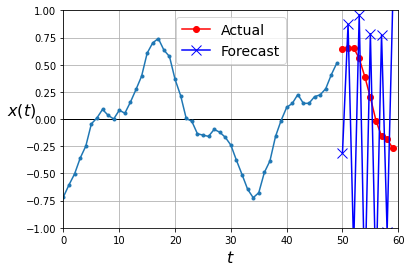

In [ ]:
# Forecasting Several Steps Ahead

np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

series.shape
X_new.shape
Y_new.shape

for step_ahead in range(10):
  y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)
  #print( y_pred_one.shape, end=", " )
  #print( X.shape )

Y_pred = X[:, n_steps:]

def plot_multiple_forecasts(X, Y, Y_pred):
  n_steps = X.shape[1]
  ahead = Y.shape[1]
  plot_series(X[0, :, 0])
  plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
  plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
  plt.axis([0, n_steps + ahead, -1, 1])
  plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
#save_fig("forecast_ahead_plot")
plt.show()

In [ ]:

np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

X = X_valid
for step_ahead in range(10):
  y_pred_one = model.predict(X)[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]
print( Y_pred.shape )

loss = np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))
print( loss )

Y_naive_pred = Y_valid[:, -1:]
loss = np.mean(keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))
print( loss )

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[50, 1]),
  keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))




(2000, 10)
1.0811181
0.22278848
Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.2186 - val_loss: 0.0606
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0535 - val_loss: 0.0425
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0406 - val_loss: 0.0353
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0343 - val_loss: 0.0311
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0300 - val_loss: 0.0283
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0278 - val_loss: 0.0264
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: 0.0249
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0246 - val_loss: 0.0237
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0236 - val_loss: 0.0229
Epoch 10/20
219/219 [==============================] - 0s 1ms/step -

Epoch 1/20
219/219 [==============================] - 5s 17ms/step - loss: 0.1216 - val_loss: 0.0317
Epoch 2/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0294 - val_loss: 0.0200
Epoch 3/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0198 - val_loss: 0.0160
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0162 - val_loss: 0.0144
Epoch 5/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0144 - val_loss: 0.0118
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0127 - val_loss: 0.0112
Epoch 7/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 8/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0114 - val_loss: 0.0103
Epoch 9/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0110 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0118 - val_lo

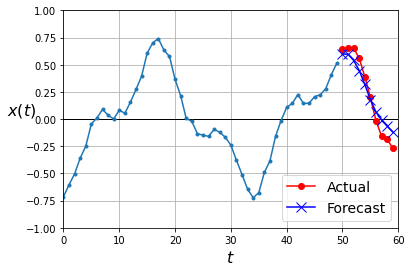

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))


np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]
print( Y_pred.shape )

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
  Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
  #print( series[..., step_ahead:step_ahead + n_steps, 0].shape )
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20, return_sequences=True),
  keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))



Epoch 1/20
219/219 [==============================] - 5s 17ms/step - loss: 0.0705 - last_time_step_mse: 0.0621 - val_loss: 0.0429 - val_last_time_step_mse: 0.0324
Epoch 2/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0413 - last_time_step_mse: 0.0301 - val_loss: 0.0363 - val_last_time_step_mse: 0.0260
Epoch 3/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0336 - last_time_step_mse: 0.0226 - val_loss: 0.0368 - val_last_time_step_mse: 0.0279
Epoch 4/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0312 - last_time_step_mse: 0.0210 - val_loss: 0.0273 - val_last_time_step_mse: 0.0155
Epoch 5/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0276 - last_time_step_mse: 0.0160 - val_loss: 0.0266 - val_last_time_step_mse: 0.0163
Epoch 6/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0257 - last_time_step_mse: 0.0131 - val_loss: 0.0248 - val_last_time_step_mse: 0.0122
Epoch 7/20
219/219 [==

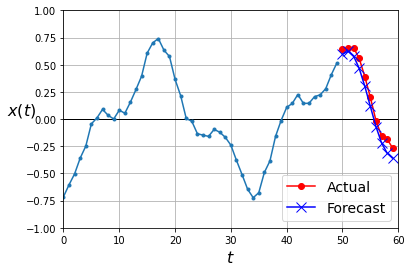

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

Epoch 1/20
219/219 [==============================] - 12s 39ms/step - loss: 0.0979 - last_time_step_mse: 0.0877 - val_loss: 0.0554 - val_last_time_step_mse: 0.0364
Epoch 2/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0515 - last_time_step_mse: 0.0326 - val_loss: 0.0427 - val_last_time_step_mse: 0.0222
Epoch 3/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0407 - last_time_step_mse: 0.0196 - val_loss: 0.0367 - val_last_time_step_mse: 0.0157
Epoch 4/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0356 - last_time_step_mse: 0.0156 - val_loss: 0.0334 - val_last_time_step_mse: 0.0132
Epoch 5/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0330 - last_time_step_mse: 0.0138 - val_loss: 0.0314 - val_last_time_step_mse: 0.0121
Epoch 6/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0313 - last_time_step_mse: 0.0124 - val_loss: 0.0298 - val_last_time_step_mse: 0.0112
Epoch 7/20
219/219 [=

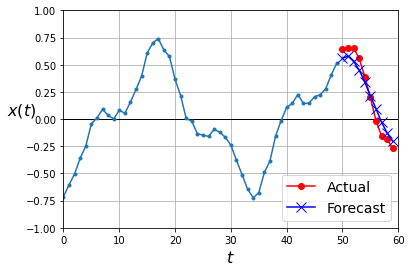

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.LSTM(20, return_sequences=True),
  keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

evl = model.evaluate(X_valid, Y_valid)
print( evl )


np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]


plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [ ]:

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid", input_shape=[None, 1]),
  keras.layers.GRU(20, return_sequences=True),
  keras.layers.GRU(20, return_sequences=True),
  keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20, validation_data=(X_valid, Y_valid[:, 3::2]))



Epoch 1/20
219/219 [==============================] - 9s 25ms/step - loss: 0.0908 - last_time_step_mse: 0.0845 - val_loss: 0.0477 - val_last_time_step_mse: 0.0396
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0437 - last_time_step_mse: 0.0357 - val_loss: 0.0367 - val_last_time_step_mse: 0.0285
Epoch 3/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0356 - last_time_step_mse: 0.0282 - val_loss: 0.0307 - val_last_time_step_mse: 0.0218
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0293 - last_time_step_mse: 0.0201 - val_loss: 0.0259 - val_last_time_step_mse: 0.0152
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0256 - last_time_step_mse: 0.0152 - val_loss: 0.0246 - val_last_time_step_mse: 0.0141
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0239 - last_time_step_mse: 0.0129 - val_loss: 0.0227 - val_last_time_step_mse: 0.0115
Epoch 7/20
219/219 [==

In [ ]:
import tensorflow as tf
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

n_steps = 5
dataset = tf.data.Dataset.from_tensor_slices(tf.range(15))
dataset = dataset.window(n_steps, shift=2, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(n_steps))

dataset = dataset.shuffle(10).map(lambda window: (window[:-1], window[1:]))
dataset = dataset.batch(3).prefetch(1)
for index, (X_batch, Y_batch) in enumerate(dataset):
  print("_" * 20, "Batch", index, "\nX_batch")
  print(X_batch.numpy())
  print("=" * 5, "\nY_batch")
  print(Y_batch.numpy())


____________________ Batch 0 
X_batch
[[6 7 8 9]
 [2 3 4 5]
 [4 5 6 7]]
===== 
Y_batch
[[ 7  8  9 10]
 [ 3  4  5  6]
 [ 5  6  7  8]]
____________________ Batch 1 
X_batch
[[ 0  1  2  3]
 [ 8  9 10 11]
 [10 11 12 13]]
===== 
Y_batch
[[ 1  2  3  4]
 [ 9 10 11 12]
 [11 12 13 14]]


In [ ]:
tmp1 = [ [1,2,3,4,5,6] ]
[tmp2] = tmp1
tmp2

[1, 2, 3, 4, 5, 6]

In [ ]:
10000 * ( 23.02495 - 22.98495 ) / 23.02495

3.704 / 94.213

(99.1 - 99) * 1 + 0.9 * 10 

2 * 0.9 * 99.1

99.1 * 99.1

0.0081 * 20 + (1 - 0.0081) * 11

import math

math.sqrt(5) * 2 * 2.326

p = 0.16
tmp = 5 + 2*4*p + 2*3*p*p + 2*2*p*p*p + 2*1*p*p*p*p  
2 * math.sqrt(tmp) * 2.326

(0.16 * 20 + 0.16 * 11 + 4.68 * 9) / 5

T = 10
s = T
p = 0.12
for i in range(1, T):
  #print(i)
  s = s + 2*i*math.pow(p, T-i)
print(s)

2 * math.sqrt(s/10)

12.417355372092718


2.2286637585865408